#Diabetes Case Prediction


In this project we use NHANES  data to be able to predict diabetes cases

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [295]:
labs=pd.read_csv("https://raw.githubusercontent.com/JuliaKav/Diabetes-Prediction/main/labs.csv")

In [296]:
labs.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,...,URXUMMA,URDUMMAL,URXVOL1,URDFLOW1,URXVOL2,URDFLOW2,URXVOL3,URDFLOW3,URXUHG,URDUHGLC,URXUBA,URDUBALC,URXUCD,URDUCDLC,URXUCO,URDUCOLC,URXUCS,URDUCSLC,URXUMO,URDUMOLC,URXUMN,URDUMNLC,URXUPB,URDUPBLC,URXUSB,URDUSBLC,URXUSN,URDUSNLC,URXUSR,URDUSRLC,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,41.0,129.0,16.0,16.0,10.0,3.57,27.0,9.5,2.375,168.0,4.344,174.0,97.0,1.21,106.96,2.4,24.0,554.0,30.75,16.0,58.0,10.4,4.3,118.0,136.0,296.0,4.3,1.388,0.8,13.68,...,NaN,NaN,87.0,0.821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,47.0,97.0,18.0,29.0,16.0,5.71,23.0,9.2,2.300,167.0,4.319,147.0,98.0,0.79,69.84,3.1,31.0,219.0,12.16,15.0,79.0,14.1,4.3,122.0,128.0,265.0,3.9,1.259,0.9,15.39,...,NaN,NaN,90.0,1.636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,37.0,99.0,22.0,16.0,14.0,5.00,23.0,8.9,2.225,127.0,3.284,44.0,105.0,1.22,107.85,2.2,22.0,183.0,10.16,13.0,98.0,17.6,4.2,134.0,142.0,288.0,4.2,1.356,0.6,10.26,...,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.14,1.0,61.0,0.575,NaN,NaN,NaN,NaN,0.84,0.0,1.14,0.0,0.025,1.0,0.401,0.0,6.53,0.0,140.0,0.0,0.092,1.0,0.14,0.0,0.087,0.0,5.26,0.0,32.94,0.0,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,43.0,78.0,36.0,28.0,31.0,11.07,31.0,10.0,2.500,207.0,5.353,60.0,100.0,0.73,64.53,2.8,28.0,104.0,5.77,31.0,91.0,16.3,4.1,201.0,142.0,290.0,4.4,1.421,0.5,8.55,...,NaN,NaN,5.0,0.109,19.0,0.137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [297]:
dem=pd.read_csv("https://raw.githubusercontent.com/JuliaKav/Diabetes-Prediction/main/demographic.csv")
dem.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,1.0,1.0,1,1.0,NaN,NaN,3.0,4.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3,3,0,0,2,1,69,1.0,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,54,1.0,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,1.0,1.0,1,1.0,NaN,NaN,4.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,72,1.0,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,NaN,NaN,1,1.0,NaN,3.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,33,1.0,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,5.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,78,1.0,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [298]:
exam=pd.read_csv("https://raw.githubusercontent.com/JuliaKav/Diabetes-Prediction/main/examination.csv")

In [299]:
exam.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,...,CSXEXSTS,CSXEXCMT,CSQ245,CSQ241,CSQ260A,CSQ260D,CSQ260G,CSQ260I,CSQ260N,CSQ260M,CSQ270,CSQ450,CSQ460,CSQ470,CSQ480,CSQ490,CSXQUIPG,CSXQUIPT,CSXNAPG,CSXNAPT,CSXQUISG,CSXQUIST,CSXSLTSG,CSXSLTST,CSXNASG,CSXNAST,CSXTSEQ,CSXCHOOD,CSXSBOD,CSXSMKOD,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,140.0,122.0,72.0,2.0,114.0,76.0,2.0,102.0,74.0,2.0,NaN,NaN,NaN,1,78.3,NaN,NaN,NaN,NaN,NaN,171.3,NaN,26.7,NaN,39.2,NaN,40.2,NaN,35.3,NaN,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,35.0,54.0,35.0,20.0,55.0,15.0,4.0,50.0,1.0,50.0,2.0,65.0,1.0,60.0,1.0,B,2.0,4.0,3.0,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,170.0,156.0,62.0,2.0,160.0,80.0,2.0,156.0,42.0,2.0,NaN,NaN,NaN,1,89.5,NaN,NaN,NaN,NaN,NaN,176.8,NaN,28.6,NaN,40.0,NaN,41.5,NaN,34.7,NaN,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,30.0,40.0,36.0,17.0,51.0,1.0,4.0,5.0,4.0,57.0,2.0,33.0,1.0,27.0,1.0,A,2.0,1.0,3.0,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,160.0,140.0,90.0,2.0,140.0,76.0,2.0,146.0,80.0,2.0,NaN,NaN,NaN,1,88.9,NaN,NaN,NaN,NaN,NaN,175.3,NaN,28.9,NaN,40.0,NaN,41.0,NaN,33.5,NaN,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,29.0,50.0,24.0,20.0,47.0,17.0,1.0,27.0,1.0,56.0,2.0,53.0,1.0,32.0,1.0,A,2.0,1.0,3.0,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,130.0,108.0,38.0,2.0,102.0,34.0,2.0,104.0,38.0,2.0,NaN,NaN,NaN,1,32.2,NaN,NaN,NaN,NaN,NaN,137.3,NaN,17.1,2.0,33.5,NaN,29.5,NaN,21.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,170.0,136.0,86.0,2.0,134.0,88.0,1.0,142.0,86.0,2.0,NaN,NaN,NaN,3,52.0,NaN,NaN,NaN,NaN,NaN,162.4,NaN,19.7,NaN,36.3,NaN,37.5,NaN,25.2,NaN,...,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,17.0,55.0,35.0,7.0,100.0,40.0,2.0,54.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,A,2.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [300]:
diet=pd.read_csv("https://raw.githubusercontent.com/JuliaKav/Diabetes-Prediction/main/diet.csv")

In [301]:
diet.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,...,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,17.819,18.493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,53.408,35.481,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,1.0,12.0,1.0,1.0,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1490.0,77.75,162.92,80.58,10.6,58.27,23.511,16.986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,1.0,13.0,4.0,NaN,4.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,7.0,1421.0,55.24,178.20,87.78,12.3,55.36,4.479,26.216,...,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [302]:
quest=pd.read_csv("https://raw.githubusercontent.com/JuliaKav/Diabetes-Prediction/main/questionnaire.csv")

In [303]:
quest.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,ALQ160,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ056,BPD058,BPQ059,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,CBD070,CBD090,CBD110,CBD120,CBD130,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,...,SXQ272,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,1.0,0.0,NaN,1.0,NaN,1.0,1.0,62.0,1.0,2.0,2.0,NaN,2.0,1.0,NaN,1.0,1.0,1.0,300.0,0.0,50.0,0.0,85.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,69.0,180.0,3.0,3.0,210.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,4.0,2.0,1.0,1.0,0.0,1.0,1.0,53.0,2.0,NaN,1.0,52.0,2.0,1.0,NaN,1.0,1.0,1.0,642.0,214.0,128.0,40.0,20.0,4.0,2.0,2.0,2.0,2.0,NaN,2.0,...,2.0,1.0,1.0,NaN,71.0,200.0,3.0,3.0,160.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,40.0,1.0,1.0,2.0,NaN,2.0,1.0,NaN,1.0,1.0,1.0,150.0,25.0,0.0,40.0,0.0,3.0,2.0,2.0,2.0,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,70.0,195.0,3.0,2.0,195.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.0,0.0,50.0,50.0,30.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,55.0,1.0,1.0,1.0,12.0,2.0,2.0,1.0,1.0,2.0,NaN,200.0,0.0,40.0,0.0,0.0,5.0,2.0,2.0,2.0,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,67.0,120.0,2.0,1.0,150.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


We want to join the data from all the above dataframes so we will drop the SEQN column from all except the firs dataframe.

In [304]:
#dem.drop(['SEQN'], axis=1,inplace=True)

In [305]:
#quest.drop(['SEQN'], axis=1,inplace=True)

In [306]:
#diet.drop(['SEQN'], axis=1,inplace=True)

In [307]:
#exam.drop(['SEQN'], axis=1,inplace=True)

In [308]:
df=pd.merge(labs,exam, on=['SEQN'])

In [309]:
df

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,...,CSXEXSTS,CSXEXCMT,CSQ245,CSQ241,CSQ260A,CSQ260D,CSQ260G,CSQ260I,CSQ260N,CSQ260M,CSQ270,CSQ450,CSQ460,CSQ470,CSQ480,CSQ490,CSXQUIPG,CSXQUIPT,CSXNAPG,CSXNAPT,CSXQUISG,CSXQUIST,CSXSLTSG,CSXSLTST,CSXNASG,CSXNAST,CSXTSEQ,CSXCHOOD,CSXSBOD,CSXSMKOD,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,41.0,129.0,16.0,16.0,10.0,3.57,27.0,9.5,2.375,168.0,4.344,174.0,97.0,1.21,106.96,2.4,24.0,554.0,30.75,16.0,58.0,10.4,4.3,118.0,136.0,296.0,4.3,1.388,0.8,13.68,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,35.0,54.0,35.0,20.0,55.0,15.0,4.0,50.0,1.0,50.0,2.0,65.0,1.0,60.0,1.0,B,2.0,4.0,3.0,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,47.0,97.0,18.0,29.0,16.0,5.71,23.0,9.2,2.300,167.0,4.319,147.0,98.0,0.79,69.84,3.1,31.0,219.0,12.16,15.0,79.0,14.1,4.3,122.0,128.0,265.0,3.9,1.259,0.9,15.39,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,30.0,40.0,36.0,17.0,51.0,1.0,4.0,5.0,4.0,57.0,2.0,33.0,1.0,27.0,1.0,A,2.0,1.0,3.0,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,37.0,99.0,22.0,16.0,14.0,5.00,23.0,8.9,2.225,127.0,3.284,44.0,105.0,1.22,107.85,2.2,22.0,183.0,10.16,13.0,98.0,17.6,4.2,134.0,142.0,288.0,4.2,1.356,0.6,10.26,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,29.0,50.0,24.0,20.0,47.0,17.0,1.0,27.0,1.0,56.0,2.0,53.0,1.0,32.0,1.0,A,2.0,1.0,3.0,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,43.0,78.0,36.0,28.0,31.0,11.07,31.0,10.0,2.500,207.0,5.353,60.0,100.0,0.73,64.53,2.8,28.0,104.0,5.77,31.0,91.0,16.3,4.1,201.0,142.0,290.0,4.4,1.421,0.5,8.55,...,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,17.0,55.0,35.0,7.0,100.0,40.0,2.0,54.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,A,2.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1.9,1.9,47.0,4154.8,4.04,67775.162806,88.0,0.88,4.9,49.0,75.0,27.0,26.0,13.0,4.64,25.0,10.0,2.500,195.0,5.043,103.0,105.0,1.10,97.24,2.6,26.0,101.0,5.61,30.0,73.0,13.1,4.1,119.0,143.0,285.0,3.5,1.130,0.9,15.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9809,83728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,6.0,6.0,117.0,10342.8,5.13,NaN,NaN,NaN,4.1,41.0,65.0,26.0,13.0,10.0,3.57,23.0,9.5,2.375,148.0,3.827,170.0,106.0,0.82,72.49,2.6,26.0,112.0,6.22,20.0,49.0,8.8,3.8,108.0,139.0,277.0,3.3,1.066,0.2,3.42,...,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,15.0,5.0,0.0,35.0,5.0,3.0,NaN,1.0,55.0,2.0,95.0,1.0,35.0,1.0,B,3.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,55.0,1.0,NaN,NaN,3.0
9811,83730,4.5,4.5,86.0,7602

In [310]:
df=pd.merge(df,dem,on=['SEQN'])

In [311]:
df=pd.merge(df,diet, on=['SEQN'])

In [312]:
df=pd.merge(df,quest, on=['SEQN'])

In [313]:
df

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,...,SXQ272,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,41.0,129.0,16.0,16.0,10.0,3.57,27.0,9.5,2.375,168.0,4.344,174.0,97.0,1.21,106.96,2.4,24.0,554.0,30.75,16.0,58.0,10.4,4.3,118.0,136.0,296.0,4.3,1.388,0.8,13.68,...,NaN,NaN,NaN,NaN,69.0,180.0,3.0,3.0,210.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,47.0,97.0,18.0,29.0,16.0,5.71,23.0,9.2,2.300,167.0,4.319,147.0,98.0,0.79,69.84,3.1,31.0,219.0,12.16,15.0,79.0,14.1,4.3,122.0,128.0,265.0,3.9,1.259,0.9,15.39,...,2.0,1.0,1.0,NaN,71.0,200.0,3.0,3.0,160.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,37.0,99.0,22.0,16.0,14.0,5.00,23.0,8.9,2.225,127.0,3.284,44.0,105.0,1.22,107.85,2.2,22.0,183.0,10.16,13.0,98.0,17.6,4.2,134.0,142.0,288.0,4.2,1.356,0.6,10.26,...,NaN,NaN,NaN,NaN,70.0,195.0,3.0,2.0,195.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,43.0,78.0,36.0,28.0,31.0,11.07,31.0,10.0,2.500,207.0,5.353,60.0,100.0,0.73,64.53,2.8,28.0,104.0,5.77,31.0,91.0,16.3,4.1,201.0,142.0,290.0,4.4,1.421,0.5,8.55,...,NaN,NaN,NaN,NaN,67.0,120.0,2.0,1.0,150.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1.9,1.9,47.0,4154.8,4.04,67775.162806,88.0,0.88,4.9,49.0,75.0,27.0,26.0,13.0,4.64,25.0,10.0,2.500,195.0,5.043,103.0,105.0,1.10,97.24,2.6,26.0,101.0,5.61,30.0,73.0,13.1,4.1,119.0,143.0,285.0,3.5,1.130,0.9,15.39,...,NaN,NaN,1.0,NaN,69.0,150.0,3.0,3.0,150.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,26.0,NaN,NaN,NaN
9809,83728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,6.0,6.0,117.0,10342.8,5.13,NaN,NaN,NaN,4.1,41.0,65.0,26.0,13.0,10.0,3.57,23.0,9.5,2.375,148.0,3.827,170.0,106.0,0.82,72.49,2.6,26.0,112.0,6.22,20.0,49.0,8.8,3.8,108.0,139.0,277.0,3.3,1.066,0.2,3.42,...,NaN,NaN,NaN,NaN,64.0,195.0,1.0,2.0,185.0,NaN,1.0,10.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,135.0,NaN,195.0,42.0,NaN,NaN,NaN
9811,83730,4.5

In [314]:
df.describe()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,...,SXQ272,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,6553.000000,6552.000000,6551.000000,6551.000000,6553.000000,6553.000000,6553.000000,6511.000000,6511.000000,6551.000000,6551.000000,6542.000000,6553.000000,6553.000000,6553.000000,6544.000000,6544.000000,6553.000000,6553.000000,6552.000000,6527.000000,6527.000000,6552.000000,6551.000000,6553.000000,6553.000000,6552.000000,6552.000000,6549.000000,6549.000000,...,3480.000000,1682.000000,1790.000000,1899.000000,6243.000000,6232.000000,6266.000000,6266.000000,6226.000000,1202.000000,5501.000000,1634.0,852.0,776.0,1774.0,384.0,228.0,113.0,108.0,83.0,194.0,26.0,1007.0,170.0,661.0,19.0,1087.0,995.0,913.0,962.0,14.0,28.0,4064.000000,4870.000000,2688.000000,5914.000000,5836.000000,1478.000000,1478.000000,1478.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,42.820845,78.578907,25.117845,24.069913,12.863269,4.592582,25.168167,9.486377,2.371594,184.505877,4.771333,153.986090,104.309171,0.880172,77.807255,2.826039,28.260391,102.290859,5.678097,26.081197,83.445534,14.946131,4.026923,126.801710,139.782542,279.273615,3.929405,1.268801,0.639235,10.930919,...,1.994828,1.318074,1.162011,1.273828,161.795291,255.587773,1.952601,2.234759,310.568423,1.371048,1.641520,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,31.0,32.0,33.0,34.0,30.0,41.0,42.0,43.0,44.0,45.0,46.0,35.0,40.0,400.188238,553.871663,367.752976,311.741123,553.798492,2.583221,2.299729,1.746955
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,3.436491,51.614841,17.740698,18.484877,5.993834,2.139780,2.269895,0.367961,0.091990,41.977990,1.085560,185.262311,2.745838,0.487262,43.074036,0.441439,4.414388,38.724165,2.149616,42.896888,36.395317,6.518856,0.354320,32.064128,2.216775,5.023304,0.651231,0.210288,0.308691,5.278621,...,0.236086,0.567214,0.852123,0.949075,969.139710,873.969339,1.012525,0.636188,1134.091728,0.529333,0.500377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1471.400188,1943.995173,1700.211868,1060.053377,7148.984994,0.784612,1.213281,0.709430
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,24.000000,9.000000,9.000000,6.000000,1.000000,0.360000,16.000000,7.600000,1.900000,72.000000,1.862000,6.000000,83.000000,0.290000,25.640000,1.400000,14.000000,49.000000,2.720000,4.000000,5.000000,0.900000,2.800000,38.000000,119.000000,237.000000,1.800000,0.581000,0.100000,1.710000,...,1.000000,1.000000,1.000000,1.000000,48.000000,75.000000,1.000000,1.000000,75.000000,1.000000,1.000000,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,31.0,32.0,33.0,34.0,30.0,41.0,42.0,43.0,44.0,45.0,46.0,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,41.000000,53.000000,19.000000,15.000000,9.000000,3.210000,24.000000,9.200000,2.300000,155.000000,4.008000,75.000000,103.000000,0.690000,61.000000,2.500000,25.000000,86.000000,4.770000,13.000000,59.000000,10.600000,3.800000,109.000000,139.000000,276.000000,3.500000,1.130000,0.400000,6.840000,...,2.000000,1.000000,1.000000,1.000000,63.000000,143.000000,1.000000,2.0000

In [315]:
df.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,...,SXQ272,SXQ280,SXQ292,SXQ294,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,41.0,129.0,16.0,16.0,10.0,3.57,27.0,9.5,2.375,168.0,4.344,174.0,97.0,1.21,106.96,2.4,24.0,554.0,30.75,16.0,58.0,10.4,4.3,118.0,136.0,296.0,4.3,1.388,0.8,13.68,...,NaN,NaN,NaN,NaN,69.0,180.0,3.0,3.0,210.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,47.0,97.0,18.0,29.0,16.0,5.71,23.0,9.2,2.300,167.0,4.319,147.0,98.0,0.79,69.84,3.1,31.0,219.0,12.16,15.0,79.0,14.1,4.3,122.0,128.0,265.0,3.9,1.259,0.9,15.39,...,2.0,1.0,1.0,NaN,71.0,200.0,3.0,3.0,160.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,37.0,99.0,22.0,16.0,14.0,5.00,23.0,8.9,2.225,127.0,3.284,44.0,105.0,1.22,107.85,2.2,22.0,183.0,10.16,13.0,98.0,17.6,4.2,134.0,142.0,288.0,4.2,1.356,0.6,10.26,...,NaN,NaN,NaN,NaN,70.0,195.0,3.0,2.0,195.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,43.0,78.0,36.0,28.0,31.0,11.07,31.0,10.0,2.500,207.0,5.353,60.0,100.0,0.73,64.53,2.8,28.0,104.0,5.77,31.0,91.0,16.3,4.1,201.0,142.0,290.0,4.4,1.421,0.5,8.55,...,NaN,NaN,NaN,NaN,67.0,120.0,2.0,1.0,150.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [316]:
df=df.dropna(axis=0, how='all')
df=df.dropna(axis=1, how='all')

In [317]:
df=df.rename(columns={'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US',
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})


In [318]:
df=df.filter(['ID','Gender','Years_in_US', 'Family_income','GlycoHemoglobin','ArmCircum','SaggitalAbdominal','GripStrength', 'Breast_fed'], axis=1)

In [319]:
df.head()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
0,73557,1,NaN,0.84,13.9,35.3,20.6,55.2,2.0
1,73558,1,NaN,1.78,9.1,34.7,24.4,61.5,2.0
2,73559,1,NaN,4.51,8.9,33.5,25.6,91.0,2.0
3,73560,1,NaN,2.52,NaN,21.0,14.9,32.2,2.0
4,73561,2,NaN,5.00,4.9,25.2,NaN,30.9,2.0


In [320]:
df

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
0,73557,1,NaN,0.84,13.9,35.3,20.6,55.2,2.0
1,73558,1,NaN,1.78,9.1,34.7,24.4,61.5,2.0
2,73559,1,NaN,4.51,8.9,33.5,25.6,91.0,2.0
3,73560,1,NaN,2.52,NaN,21.0,14.9,32.2,2.0
4,73561,2,NaN,5.00,4.9,25.2,NaN,30.9,2.0
...,...,...,...,...,...,...,...,...,...
9808,83727,1,NaN,NaN,5.0,29.9,19.1,70.1,2.0
9809,83728,2,NaN,1.95,NaN,14.7,NaN,NaN,2.0
9810,83729,2,6.0,3.66,5.3,37.0,24.3,46.6,2.0
9811,83730,1,NaN,1.05,NaN,19.0,NaN,20.8,NaN


In [321]:
df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,1852.000000,9083.000000,6643.000000,9301.000000,7218.000000,7677.000000,8661.000000
mean,78644.559971,1.507694,8.847732,2.248930,5.642556,28.485765,21.114034,63.054891,1.984528
std,2938.592266,0.499966,17.651697,1.629325,1.004850,7.961971,4.963949,25.098439,0.123426
min,73557.000000,1.000000,1.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,3.000000,0.880000,5.200000,22.600000,17.300000,45.600000,2.000000
50%,78643.000000,2.000000,5.000000,1.700000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,7.000000,3.580000,5.800000,34.000000,24.400000,80.700000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


In [322]:
df['GlycoHemoglobin']

0       13.9
1        9.1
2        8.9
3        NaN
4        4.9
        ... 
9808     5.0
9809     NaN
9810     5.3
9811     NaN
9812     NaN
Name: GlycoHemoglobin, Length: 9813, dtype: float64

In [323]:
df.isna().sum()

ID                      0
Gender                  0
Years_in_US          7961
Family_income         730
GlycoHemoglobin      3170
ArmCircum             512
SaggitalAbdominal    2595
GripStrength         2136
Breast_fed           1152
dtype: int64

In [324]:
df['GlycoHemoglobin']=df['GlycoHemoglobin'].fillna(df.GlycoHemoglobin.mean())

In [325]:
# if GlycoHemoglobin is <6, then we have a 'Normal status', 
#if 6<= GlycoHemoglobin <6.5 then we have 'High risk of diabetes' 
#and if GlycoHemoglobin >=6.5 we have 'Diabetes patients'.
#We create a new column 'Diabetes with values 0,1,2 respectively.

df.loc[df['GlycoHemoglobin']<6.0 , 'Diabetes'] =0

In [326]:
df.loc[(df['GlycoHemoglobin'] >=6.0) & (df['GlycoHemoglobin']<6.5), 'Diabetes']=1
df.loc[df['GlycoHemoglobin'] >=6.5, 'Diabetes'] =2

In [327]:
df

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,NaN,0.84,13.900000,35.3,20.6,55.2,2.0,2.0
1,73558,1,NaN,1.78,9.100000,34.7,24.4,61.5,2.0,2.0
2,73559,1,NaN,4.51,8.900000,33.5,25.6,91.0,2.0,2.0
3,73560,1,NaN,2.52,5.642556,21.0,14.9,32.2,2.0,0.0
4,73561,2,NaN,5.00,4.900000,25.2,NaN,30.9,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9808,83727,1,NaN,NaN,5.000000,29.9,19.1,70.1,2.0,0.0
9809,83728,2,NaN,1.95,5.642556,14.7,NaN,NaN,2.0,0.0
9810,83729,2,6.0,3.66,5.300000,37.0,24.3,46.6,2.0,0.0
9811,83730,1,NaN,1.05,5.642556,19.0,NaN,20.8,NaN,0.0


In [328]:
df.isna().sum()

ID                      0
Gender                  0
Years_in_US          7961
Family_income         730
GlycoHemoglobin         0
ArmCircum             512
SaggitalAbdominal    2595
GripStrength         2136
Breast_fed           1152
Diabetes                0
dtype: int64

In [329]:
# We will fill the Nan values of SaggitalAbdominal, GripStrength, ArmCircum with their median

In [330]:
df['SaggitalAbdominal']=df['SaggitalAbdominal'].fillna(df.SaggitalAbdominal.median())

In [331]:
df['ArmCircum']=df['ArmCircum'].fillna(df.ArmCircum.median())

In [332]:
df['GripStrength']=df['GripStrength'].fillna(df.GripStrength.median())

In [333]:
df

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,NaN,0.84,13.900000,35.3,20.6,55.2,2.0,2.0
1,73558,1,NaN,1.78,9.100000,34.7,24.4,61.5,2.0,2.0
2,73559,1,NaN,4.51,8.900000,33.5,25.6,91.0,2.0,2.0
3,73560,1,NaN,2.52,5.642556,21.0,14.9,32.2,2.0,0.0
4,73561,2,NaN,5.00,4.900000,25.2,20.7,30.9,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9808,83727,1,NaN,NaN,5.000000,29.9,19.1,70.1,2.0,0.0
9809,83728,2,NaN,1.95,5.642556,14.7,20.7,60.3,2.0,0.0
9810,83729,2,6.0,3.66,5.300000,37.0,24.3,46.6,2.0,0.0
9811,83730,1,NaN,1.05,5.642556,19.0,20.7,20.8,NaN,0.0


In [334]:
df.isna().sum()

ID                      0
Gender                  0
Years_in_US          7961
Family_income         730
GlycoHemoglobin         0
ArmCircum               0
SaggitalAbdominal       0
GripStrength            0
Breast_fed           1152
Diabetes                0
dtype: int64

In [335]:
df['Breast_fed']

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
9808    2.0
9809    2.0
9810    2.0
9811    NaN
9812    2.0
Name: Breast_fed, Length: 9813, dtype: float64

In [336]:
# Fill Nan for 'BreastFed' to 1

In [337]:
df['Breast_fed']=df['Breast_fed'].fillna(1)

In [338]:
df.isna().sum()

ID                      0
Gender                  0
Years_in_US          7961
Family_income         730
GlycoHemoglobin         0
ArmCircum               0
SaggitalAbdominal       0
GripStrength            0
Breast_fed              0
Diabetes                0
dtype: int64

In [339]:
# Fill in the Nan for Family_income to the previous values using ffill

df['Family_income'] = df['Family_income'].fillna(method='ffill')

In [340]:
df

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,NaN,0.84,13.900000,35.3,20.6,55.2,2.0,2.0
1,73558,1,NaN,1.78,9.100000,34.7,24.4,61.5,2.0,2.0
2,73559,1,NaN,4.51,8.900000,33.5,25.6,91.0,2.0,2.0
3,73560,1,NaN,2.52,5.642556,21.0,14.9,32.2,2.0,0.0
4,73561,2,NaN,5.00,4.900000,25.2,20.7,30.9,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9808,83727,1,NaN,3.81,5.000000,29.9,19.1,70.1,2.0,0.0
9809,83728,2,NaN,1.95,5.642556,14.7,20.7,60.3,2.0,0.0
9810,83729,2,6.0,3.66,5.300000,37.0,24.3,46.6,2.0,0.0
9811,83730,1,NaN,1.05,5.642556,19.0,20.7,20.8,1.0,0.0


In [341]:
from sklearn.feature_selection import VarianceThreshold

In [342]:
# We do not want features with lower variance than a defined threshold
var=VarianceThreshold(threshold=0.15)
var.fit_transform(df)
df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
count,9813.000000,9813.000000,1852.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,78644.559971,1.507694,8.847732,2.246474,5.642556,28.528248,21.004545,62.455233,1.868949,0.182921
std,2938.592266,0.499966,17.651697,1.630113,0.826745,7.753571,4.261142,22.228196,0.337473,0.522102
min,73557.000000,1.000000,1.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000,0.000000
25%,76092.000000,1.000000,3.000000,0.870000,5.300000,23.200000,18.500000,50.300000,2.000000,0.000000
50%,78643.000000,2.000000,5.000000,1.710000,5.642556,29.300000,20.700000,60.300000,2.000000,0.000000
75%,81191.000000,2.000000,7.000000,3.580000,5.642556,33.800000,22.900000,73.300000,2.000000,0.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000,2.000000


#Visualizing the data and correlations

In [343]:
import matplotlib as matplot

In [344]:
import seaborn as sns

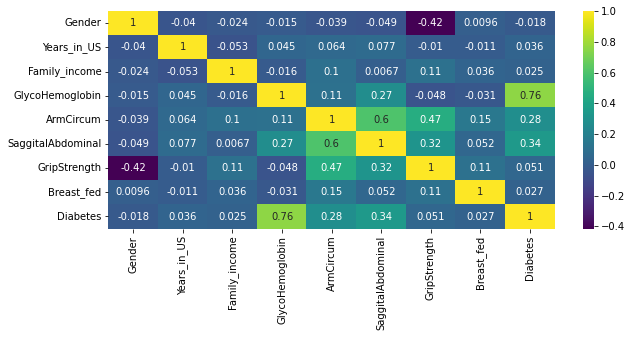

In [345]:
plt.figure(figsize=(10,4))

sns.heatmap(df.drop('ID', axis=1).corr(), cmap='viridis', annot=True)

#Linear Regression Model

In [346]:
from sklearn.linear_model import LinearRegression


In [347]:
lin_model = LinearRegression()

In [348]:
# We want to first drop the 'Glycohemoglobin' column since it is directly related to the labels
df.drop('GlycoHemoglobin', axis=1, inplace=True)

In [349]:
df

,ID,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,NaN,0.84,35.3,20.6,55.2,2.0,2.0
1,73558,1,NaN,1.78,34.7,24.4,61.5,2.0,2.0
2,73559,1,NaN,4.51,33.5,25.6,91.0,2.0,2.0
3,73560,1,NaN,2.52,21.0,14.9,32.2,2.0,0.0
4,73561,2,NaN,5.00,25.2,20.7,30.9,2.0,0.0
...,...,...,...,...,...,...,...,...,...
9808,83727,1,NaN,3.81,29.9,19.1,70.1,2.0,0.0
9809,83728,2,NaN,1.95,14.7,20.7,60.3,2.0,0.0
9810,83729,2,6.0,3.66,37.0,24.3,46.6,2.0,0.0
9811,83730,1,NaN,1.05,19.0,20.7,20.8,1.0,0.0


In [350]:
df['Years_in_US']=df['Years_in_US'].fillna(0)

In [351]:
df

,ID,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,73557,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,73558,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,73559,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,73560,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,73561,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0
...,...,...,...,...,...,...,...,...,...
9808,83727,1,0.0,3.81,29.9,19.1,70.1,2.0,0.0
9809,83728,2,0.0,1.95,14.7,20.7,60.3,2.0,0.0
9810,83729,2,6.0,3.66,37.0,24.3,46.6,2.0,0.0
9811,83730,1,0.0,1.05,19.0,20.7,20.8,1.0,0.0


In [352]:
from sklearn.model_selection import train_test_split

In [353]:
X=df.drop(['Diabetes'], axis=1)

In [354]:
X

,ID,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
0,73557,1,0.0,0.84,35.3,20.6,55.2,2.0
1,73558,1,0.0,1.78,34.7,24.4,61.5,2.0
2,73559,1,0.0,4.51,33.5,25.6,91.0,2.0
3,73560,1,0.0,2.52,21.0,14.9,32.2,2.0
4,73561,2,0.0,5.00,25.2,20.7,30.9,2.0
...,...,...,...,...,...,...,...,...
9808,83727,1,0.0,3.81,29.9,19.1,70.1,2.0
9809,83728,2,0.0,1.95,14.7,20.7,60.3,2.0
9810,83729,2,6.0,3.66,37.0,24.3,46.6,2.0
9811,83730,1,0.0,1.05,19.0,20.7,20.8,1.0


In [355]:
y=df['Diabetes']

In [356]:
X_train, X_test, y_train, y_test=train_test_split(X,y)

In [357]:
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [358]:
pred=lin_model.predict(X_test)

In [359]:
from sklearn.metrics import mean_squared_error, r2_score

lin_score=lin_model.score(X_test,y_test)
print(f'LinearCoeffr: {lin_model.coef_}')
print(f'LinearMeanSquaredErr: {mean_squared_error(y_test,pred)}')
print(f'R2Score: {r2_score(y_test,pred)}')
print(f'Score: {lin_model.score(X_test,y_test)}')

LinearCoeffr: [-1.52012951e-06 -5.72164784e-02  3.01510466e-03  7.32014272e-03
  1.06592629e-02  3.44371756e-02 -3.35718036e-03  1.13699925e-02]
LinearMeanSquaredErr: 0.24697714767699336
R2Score: 0.15127946039561913
Score: 0.15127946039561913


#Bagging classifiers

In [360]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

In [361]:
bag=BaggingClassifier(DecisionTreeClassifier(),bootstrap=False)

In [362]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [363]:
bag.predict(X_test)

array([2., 0., 0., ..., 0., 0., 2.])

In [364]:
dt_score=bag.score(X_test,y_test)

In [365]:
dt_score

0.7970660146699267

In [366]:
# Using KNeighbors classifier
from sklearn.neighbors import KNeighborsClassifier
bag=BaggingClassifier(KNeighborsClassifier(),bootstrap=False)
bag.fit(X_train,y_train)
bag.predict(X_test)
kn_score=bag.score(X_test,y_test)
kn_score

0.8683781581092095

In [367]:
# Using a Neural Network
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)
mlp.fit(X_train,y_train)
mlp.predict(X_test)
nn_score=mlp.score(X_test,y_test)
nn_score

0.8712306438467807

In [368]:
# Creating a new datafram with columns 'Model' and 'Score'

In [369]:
scores=pd.Series([lin_score,dt_score,kn_score,nn_score])
models=pd.Series(['Linear Regression','Bagging Decision Tree','Bagging KNeighbors', 'Neural Network'])
comp_df=pd.concat([models,scores],axis=1)

In [370]:
comp_df

,0,1
0,Linear Regression,0.151279
1,Bagging Decision Tree,0.797066
2,Bagging KNeighbors,0.868378
3,Neural Network,0.871231


In [371]:
comp_df.columns=['Model','Score']

In [372]:
comp_df.sort_values(by='Score', ascending=False)

,Model,Score
3,Neural Network,0.871231
2,Bagging KNeighbors,0.868378
1,Bagging Decision Tree,0.797066
0,Linear Regression,0.151279


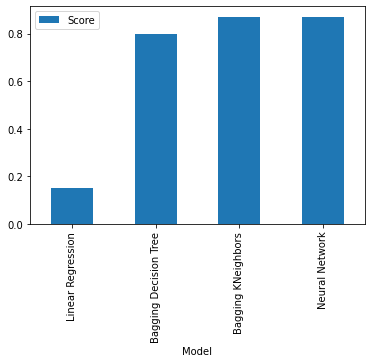

In [373]:
comp_df.plot(x='Model', y='Score', kind='bar', title='Comparison of Models')